In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
arr = np.load('perfmat1461944084.npy')

First, let's just look at raw event counts...

Recall the _column_ ("x") is the truth and the _row_ ("y") is the reconstructed - so in the event counts histogram, if you sum all the events in a column, you get all the events truly from that segment. If you sum all the events in a row, you get all the events reconstructed in that segment.

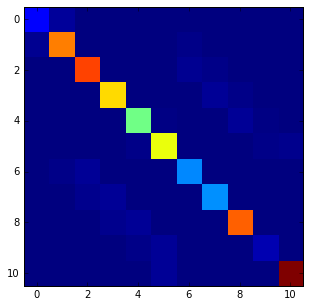

In [20]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

In [4]:
arr_tracks = np.load('tracks_with_cuts_updated.npy')

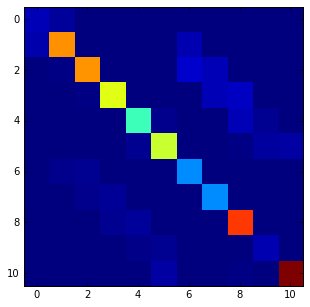

In [21]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, what fraction of the events really come from target 1? what fraction came from segments 0 or 6?, etc."

In [22]:
arr3 = np.arange(16, dtype=np.float32).reshape(4, 4)
print arr3

[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


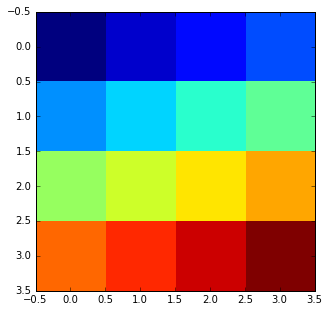

In [28]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr3, cmap=plt.get_cmap('jet'), interpolation='nearest')

In [25]:
print arr3.sum(axis=0)  # sum the columns

[ 24.  28.  32.  36.]


In [26]:
print arr3.sum(axis=1)  # sum the rows

[  6.  22.  38.  54.]


In [27]:
arr4 = np.zeros_like(arr3)
for i in range(4):
    arr4[i, :] = arr3[i, :] / arr3.sum(axis=1)[i]   # sum the rows
print arr4

[[ 0.          0.16666667  0.33333334  0.5       ]
 [ 0.18181819  0.22727273  0.27272728  0.31818181]
 [ 0.21052632  0.23684211  0.2631579   0.28947368]
 [ 0.22222222  0.24074075  0.25925925  0.27777779]]


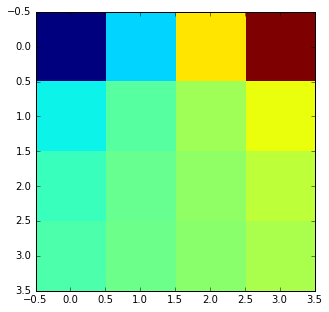

In [29]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr4, cmap=plt.get_cmap('jet'), interpolation='nearest')

In [30]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]
    
pur_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    pur_tracks[i, :] = arr_tracks[i, :] / arr_tracks.sum(axis=1)[i]

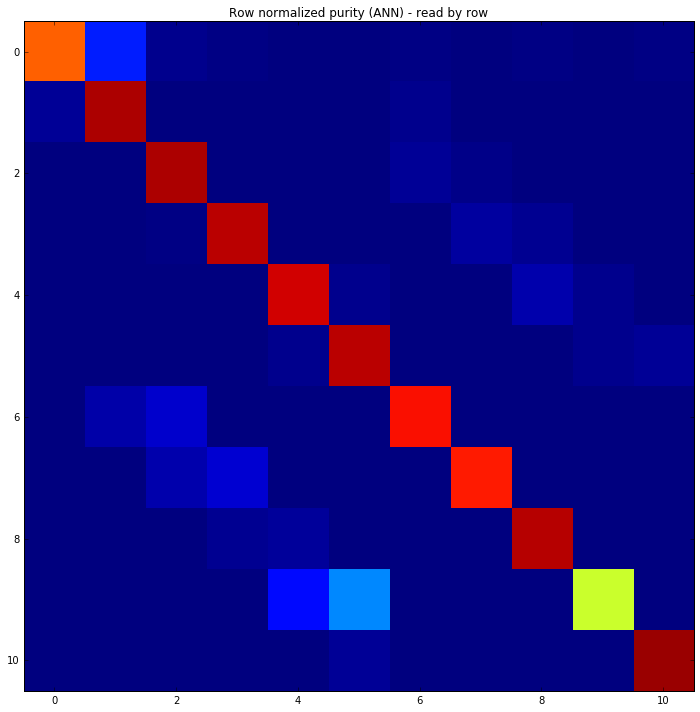

In [34]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (ANN) - read by row")
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

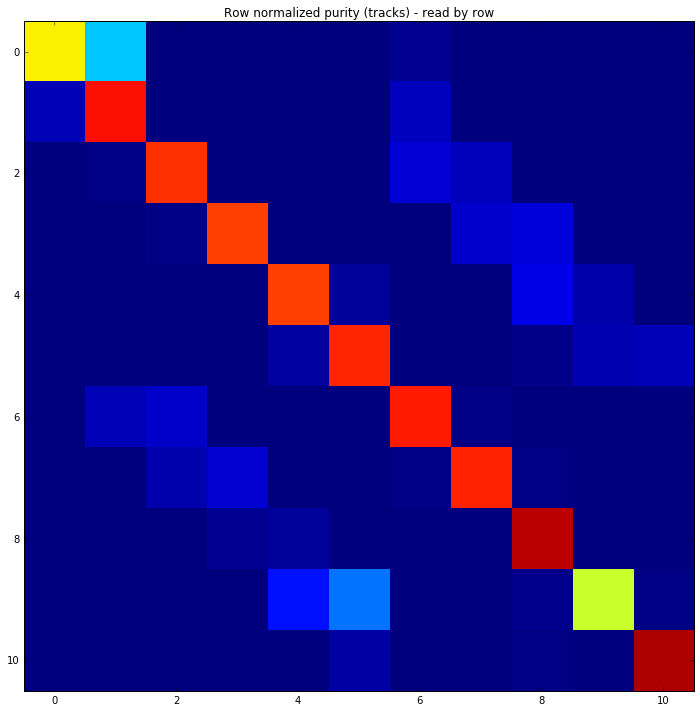

In [35]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (tracks) - read by row")
plt.imshow(pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [13]:
print np.max(pur - pur_tracks)
print np.min(pur - pur_tracks)

0.152263282176
-0.167228965377


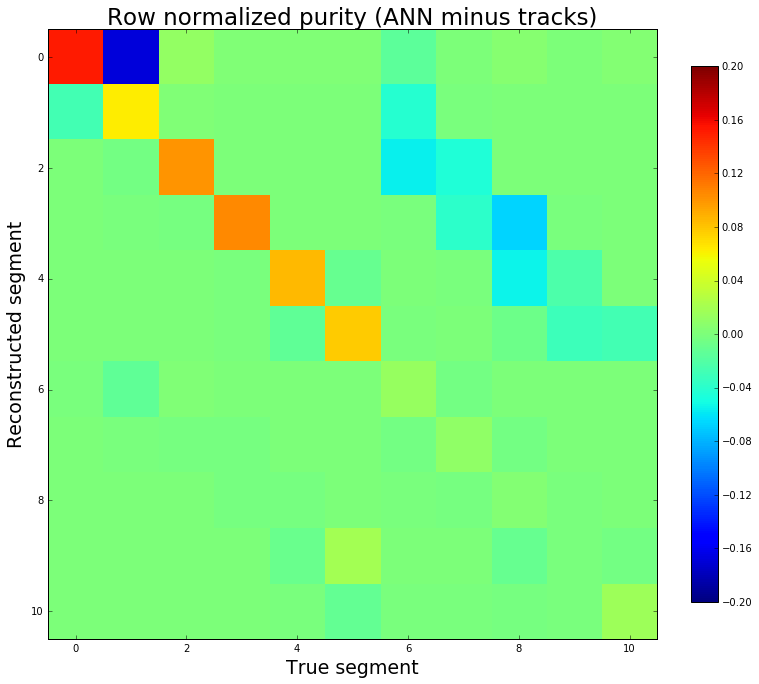

In [63]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (ANN minus tracks)", fontsize=23)
plt.imshow(pur - pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.2, vmax=0.2)
plt.colorbar(fraction=0.04)
plt.xlabel('True segment', fontsize=19)
plt.ylabel('Reconstructed segment', fontsize=19)
fig.savefig('zseg_rownorm_1461944084.pdf')

We column normalize (divide by `axis=0` to get the _efficiency_ - it is saying "okay, I have an event really coming from target 1 (reading the "y-axis"), was it reconstructed in target 1?, etc. (reading along the x for a given y)"

In [52]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]
    
eff_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    eff_tracks[:, i] = arr_tracks[:, i] / arr_tracks.sum(axis=0)[i]

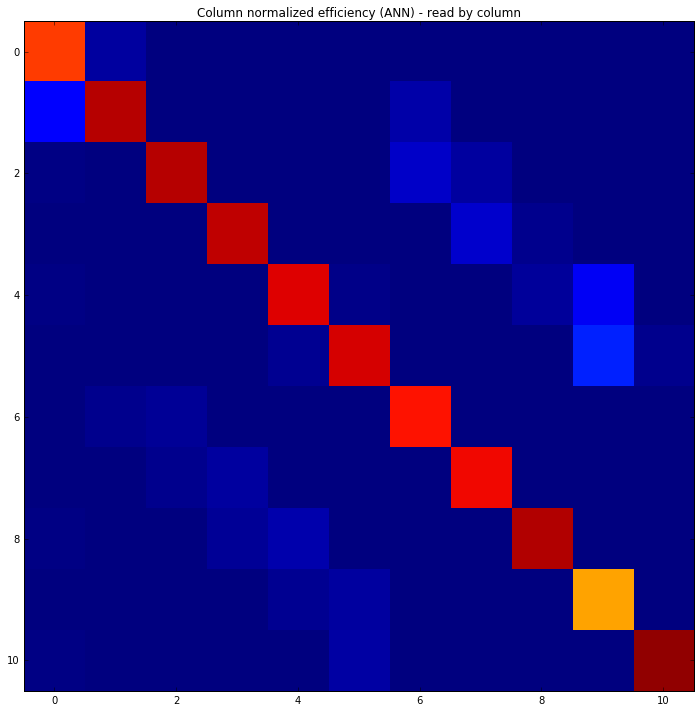

In [53]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (ANN) - read by column")
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

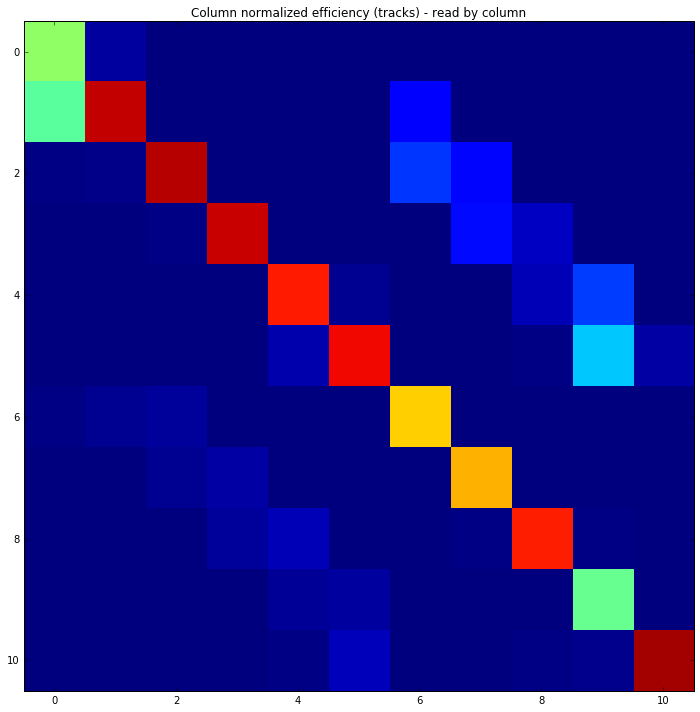

In [54]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (tracks) - read by column")
plt.imshow(eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [55]:
print np.max(eff - eff_tracks)
print np.min(eff - eff_tracks)

0.322467090474
-0.335030856344


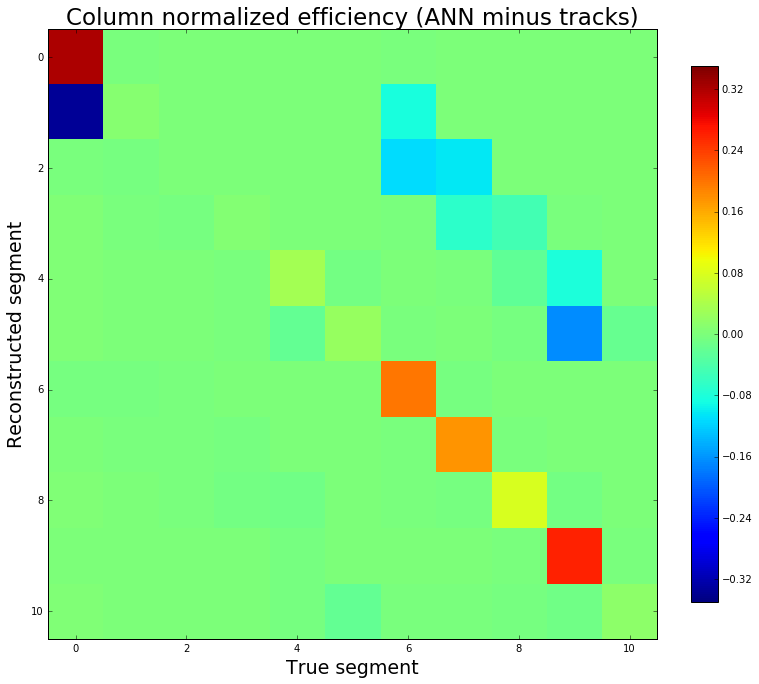

In [62]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (ANN minus tracks)", fontsize=23)
plt.imshow(eff - eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.35, vmax=0.35)
plt.colorbar(fraction=0.04)
plt.xlabel('True segment', fontsize=19)
plt.ylabel('Reconstructed segment', fontsize=19)
fig.savefig('zseg_colnorm_1461944084.pdf')